In [2]:
#查看该数据文件有多少缺失数据
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv("winemag-data_first150k.csv",index_col=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [2]:
df.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [18]:
#将所有为空值的数据项删除
n_df = df.dropna()
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      39241 non-null  object 
 1   description  39241 non-null  object 
 2   designation  39241 non-null  object 
 3   points       39241 non-null  int64  
 4   price        39241 non-null  float64
 5   province     39241 non-null  object 
 6   region_1     39241 non-null  object 
 7   region_2     39241 non-null  object 
 8   variety      39241 non-null  object 
 9   winery       39241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.3+ MB


In [9]:
n_df.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

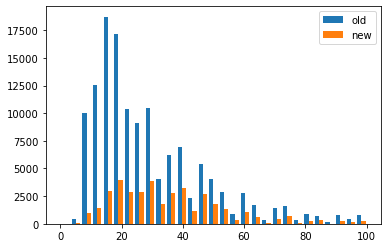

In [16]:
#画出删除后的与删除前的文件的对比
bins = np.linspace(0, 100, 30)
plt.hist([df.price, n_df.price], bins,label=['old', 'new'])
plt.legend(loc='upper right')
plt.show()

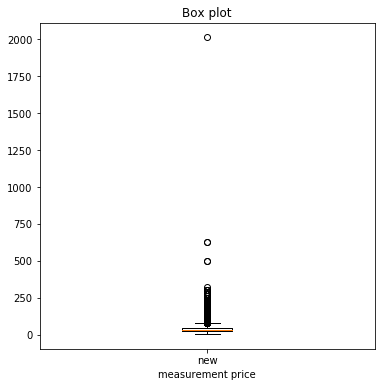

In [27]:
#直方图统计
fig = plt.figure(figsize=(6,6))
plt.boxplot([n_df.price],labels=['new'])  
plt.xlabel('measurement price')
t = plt.title('Box plot')
plt.show()

In [9]:
#采用最多频率匹配缺失项
imp = SimpleImputer(strategy="most_frequent")
m_df=imp.fit_transform(df.price.values.reshape(-1, 1))

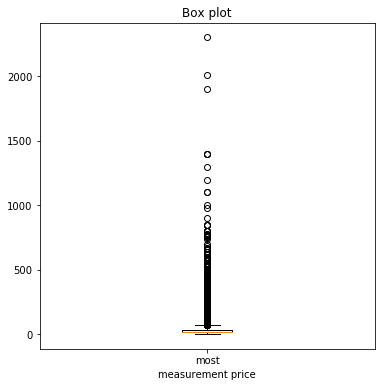

In [11]:
fig = plt.figure(figsize=(6,6))
plt.boxplot(m_df,labels=['most'])  
plt.xlabel('measurement price')
t = plt.title('Box plot')
plt.show()